In [130]:
import glob 
import os
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

save_dir = "/home/hanna/MS-figures/"

In [28]:
def get_path(year, month, base = '/home/hanna/lagrings/ERA5_monthly/'):
    month ="%2.2d" %month # includng leading zeros.
    search_str = '{}*{}*tcc.nc'.format(year, month)
    return glob.glob(os.path.join(base, search_str))
    

In [47]:
year = 2012
month = 1


In [48]:
test

['/home/hanna/lagrings/ERA5_monthly/2012_01_tcc.nc']

In [126]:
def get_missing_hours(year, month):
    files = get_path(year, month)
    
    if len(files) == 0:
        print("year: {}, month: {}".format(year, month))
        return np.nan
    else:
        fil = files[0]
        if month < 10:
            month1 = "%2.2d" %month
            month2 = "%2.2d" %(month+1)
            year2 = year

        elif month == 12:
            year2 = year+1
            month1 = month 
            month2="01"
        else:
            month1 = month
            month2 = month + 1
            year2  = year 
            
        data = xr.open_dataset(fil)
        #print(data)
        start = '{}-{}-01'.format(year, month1)
        stop = '{}-{}-01'.format(year2, month2)
        
        timearray = np.arange(start, stop, np.timedelta64(1,'h'), dtype='datetime64[ns]')
        #print(len(timearray))
        ll = data.time.values.astype(np.datetime64)
        
        counter = 0
        for element in timearray:
            if element not in ll:
                counter += 1
                
        assert len(timearray) >= counter, "how, start {}, stop {}, "\
                    "len timearray {}, counter {}".format(start, stop, len(timearray), counter)
        return counter 

In [127]:
years = np.arange(2004, 2019)
months = np.arange(1, 13)
storage = {}
for y in years:
    storage[str(y)] = {}
    for m in months:      
        storage[str(y)][str(m)] = get_missing_hours(y, m)



year: 2004, month: 1
year: 2004, month: 2
year: 2004, month: 3
year: 2009, month: 5
year: 2017, month: 11


In [128]:
import pandas as pd
df = pd.DataFrame.from_dict(storage)

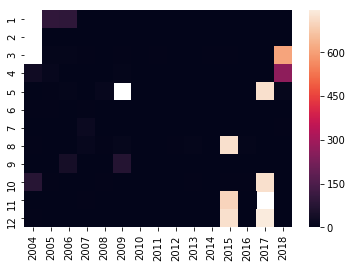

In [131]:
sns.heatmap(df)
plt.savefig(os.path.join(save_dir, "heat_map_missing_values.png"))

In [83]:
storage

{2012: {1: 0,
  2: 696,
  3: 744,
  4: 720,
  5: 744,
  6: 720,
  7: 744,
  8: 744,
  9: 720,
  10: 9504,
  11: 9480,
  12: 744},
 2013: {1: 744,
  2: 672,
  3: 744,
  4: 720,
  5: 744,
  6: 720,
  7: 744,
  8: 744,
  9: 720,
  10: 9504,
  11: 9480,
  12: 744},
 2014: {1: 744,
  2: 672,
  3: 744,
  4: 720,
  5: 744,
  6: 720,
  7: 744,
  8: 744,
  9: 720,
  10: 9504,
  11: 9480,
  12: 744},
 2015: {1: 744,
  2: 672,
  3: 744,
  4: 720,
  5: 744,
  6: 720,
  7: 744,
  8: 744,
  9: 720,
  10: 9528,
  11: 9504,
  12: 744},
 2016: {1: 744,
  2: 696,
  3: 744,
  4: 720,
  5: 744,
  6: 720,
  7: 744,
  8: 744,
  9: 720,
  10: 9504,
  11: 9480,
  12: 744},
 2017: {1: 744,
  2: 672,
  3: 744,
  4: 720,
  5: 744,
  6: 720,
  7: 744,
  8: 744,
  9: 720,
  10: 9504,
  11: nan,
  12: 744},
 2018: {1: 744,
  2: 672,
  3: 744,
  4: 720,
  5: 744,
  6: 720,
  7: 744,
  8: 744,
  9: 720,
  10: 9504,
  11: 9480,
  12: 744}}

In [64]:
len(timearray)

744

In [60]:
ll = data.time.values.astype(np.datetime64)

In [63]:
len(ll)

744

In [62]:
counter

0

In [53]:




np.arange(  np.datetime(year, month, 1) , np.datetime(year, month+1, 1)  )


AttributeError: module 'numpy' has no attribute 'datetime'

In [ ]:
def get_missing_hours(year, month):
    
    
    return 